# Arbeiten mit dem Network Common Data Format (NetCDF) Dateiformat

## Möglichkeiten NetCDFs zuladen
- [netcdf4-python](http://unidata.github.io/netcdf4-python)
  - Unterstützung der kompletten netCDF4 Spezifikation
  - Unterstützung von ```SUBDATASETs```
- [PyNIO](https://www.pyngl.ucar.edu/Nio.shtml)
   - Unterstützung verschiedener wissenschaftlicher Datenformate (NetCDF 3/4, GRIB1,
GRIB2, HDF4, HDF-EOS2, HDF-EOS5, shapefile, CCM History tape) mit einem einheitlichen File-Interface für alle unterstützten Formate  basierend auf dem NetCDF interface.
   - Installation nicht "trivial"
   - Mehr Infos zu [netcdf4-python vs PyNIO](http://mailman.ucar.edu/pipermail/pyngl-talk/2015-June/000049.html)
- [rasterio](https://mapbox.github.io/rasterio/) 
  - nur lesend (https://mapbox.github.io/rasterio/_modules/rasterio/drivers.html)
    - Verwendung von netcdf4-python wird zur Zeit von der rasterio Gemeinschaft empfohlen
  - Unterstützt zur Zeit  keine ```SUBDATASETs``` (siehe [github issue 772](https://github.com/mapbox/rasterio/issues/772))

# Laden des NetCDF mittels [netcdf4-python](http://unidata.github.io/netcdf4-python/)

In [82]:
import netCDF4
import numpy as np

- f ist das Dataset Objekt, welches die geöffnete netCDF Datei repräsentiert
- Mit ```print``` können zusammengefasste Informationen ausgeben werden, ähnlich zu dem Befehl ```ncdump -h``` aus [ndetcdf](http://www.unidata.ucar.edu/software/netcdf/)

In [83]:
f = netCDF4.Dataset('20170306000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-EUR-adjusted-MYO-002x002_0024-v02-fv01.nc')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.6.0 (http://code.zmaw.de/projects/cdi)
    history: Tue Mar 07 06:00:33 2017: cdo select,name=adjusted_sea_surface_temperature,satellite_zenith_angle,solar_zenith_angle 20170306000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-EUR-adjusted-MYO-002x002_0024-v02-fv01.nc temp.nc
CMEMS processor XXX.YY;20170305121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20170305_121903-v02.0-fv01.0.nc;20170305122803-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20170305_122803-v02.0-fv01.0.nc;20170305123103-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20170305_123103-v02.0-fv01.0.nc;20170305122203-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20170305_122203-v02.0-fv01.0.nc;20170305122503-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-sstmgr_metop01_20170305_122503-v02.0-fv01.0.nc;20170305140103-

# Die Variabeln des NetCDF 

In [84]:
print(f.variables.keys()) # get all variable names


odict_keys(['lon', 'lat', 'time', 'satellite_zenith_angle', 'solar_zenith_angle', 'adjusted_sea_surface_temperature'])


In [85]:
temp = f.variables['adjusted_sea_surface_temperature']  # temperature variable
print(temp)

<class 'netCDF4._netCDF4.Variable'>
>i2 adjusted_sea_surface_temperature(time, lat, lon)
    standard_name: sea_surface_subskin_temperature
    long_name: adjusted sea surface temperature
    units: kelvin
    add_offset: 273.15
    scale_factor: 0.01
    _FillValue: -32768
    comment: priorities: exemple : ATS_NR_2P, AVHHRMTA, NAR17_SST, NAR18_SST, AVHRR17_L, AVHRR18_L, AVHRR17_G, AVHRR18_G, SEVIRI_1H_SST, GOES_12_1H_SST, AMSRE, TMI, MODIS_A, MODIS_T
unlimited dimensions: time
current shape = (1, 2500, 4750)
filling on


# Dimensionen auflisten

In [86]:
for d in f.dimensions.items():
    print(d)

('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 4750
)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 2500
)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1
)


In [87]:
temp.dimensions

('time', 'lat', 'lon')

In [88]:
temp.shape

(1, 2500, 4750)

In [89]:
mt = f.variables['time']
lat,lon = f.variables['lat'], f.variables['lon']
print(mt)
print(lat)
print(lon)

<class 'netCDF4._netCDF4.Variable'>
>f8 time(time)
    standard_name: time
    long_name: reference time of sst file
    units: seconds since 1981-01-01 00:00:00
    calendar: standard
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
>f4 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (2500,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
>f4 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (4750,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [90]:
time = mt[:]  # Reads the netCDF variable MT, array of one element
print(time)

[  1.14160320e+09]


In [91]:
print('shape of temp variable: %s' % repr(temp.shape))


shape of temp variable: (1, 2500, 4750)


In [92]:
print(lat[:])

[ 20.01000023  20.03000069  20.04999924 ...,  69.94999695  69.97000122
  69.98999786]


In [93]:
print(temp[:])

[[[297.1499938964844 297.17999267578125 297.05999755859375 ..., -- -- --]
  [297.1499938964844 297.1600036621094 297.2099914550781 ..., -- -- --]
  [297.03997802734375 297.2099914550781 297.1499938964844 ..., -- -- --]
  ..., 
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]
  [-- -- -- ..., -- -- --]]]


In [94]:
temp.units

'kelvin'

# Plotten des NetCDF mittels matplotlib

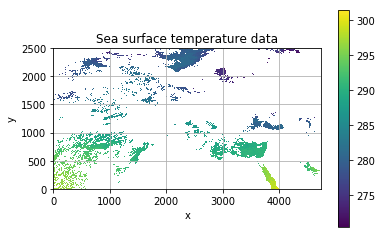

In [95]:
import matplotlib.pyplot as plt

plt.imshow(f['adjusted_sea_surface_temperature'][0,:,:], origin='lower') #Place the [0,0] index of the array in the lower left corner of the axes.
plt.colorbar()
plt.title('Sea surface temperature data')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.show()

# Plotten des NetCDF mittels xarray und matplotlib

Zur Vorbereitung der Visualisierung des NetCDF in matplotlib wird [xarray](http://xarray.pydata.org/) verwendet.

In [96]:
import xarray as xr
ds = xr.open_dataset('20170306000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-EUR-adjusted-MYO-002x002_0024-v02-fv01.nc')

## Dataset Properties

In [97]:
ds

<xarray.Dataset>
Dimensions:                           (lat: 2500, lon: 4750, time: 1)
Coordinates:
  * lon                               (lon) float32 -39.99 -39.97 -39.95 ...
  * lat                               (lat) float32 20.01 20.03 20.05 20.07 ...
  * time                              (time) datetime64[ns] 2017-03-06
Data variables:
    satellite_zenith_angle            (time, lat, lon) float64 17.0 16.0 ...
    solar_zenith_angle                (time, lat, lon) float64 134.0 134.0 ...
    adjusted_sea_surface_temperature  (time, lat, lon) float64 297.1 297.2 ...
Attributes:
    CDI: Climate Data Interface version 1.6.0 (http://code.zmaw.de/projects/cdi)
    history: Tue Mar 07 06:00:33 2017: cdo select,name=adjusted_sea_surface_temperature,satellite_zenith_angle,solar_zenith_angle 20170306000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-EUR-adjusted-MYO-002x002_0024-v02-fv01.nc temp.nc
CMEMS processor XXX.YY;20170305121903-OSISAF-L2P_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-s

In [98]:
ds['adjusted_sea_surface_temperature'][0, 0, 0]

<xarray.DataArray 'adjusted_sea_surface_temperature' ()>
array(297.1499933600426)
Coordinates:
    lon      float32 -39.99
    lat      float32 20.01
    time     datetime64[ns] 2017-03-06
Attributes:
    standard_name: sea_surface_subskin_temperature
    long_name: adjusted sea surface temperature
    units: kelvin
    comment: priorities: exemple : ATS_NR_2P, AVHHRMTA, NAR17_SST, NAR18_SST, AVHRR17_L, AVHRR18_L, AVHRR17_G, AVHRR18_G, SEVIRI_1H_SST, GOES_12_1H_SST, AMSRE, TMI, MODIS_A, MODIS_T

In [99]:
map_data = ds['adjusted_sea_surface_temperature'].sel(time='2017-03-06T00:00:00')

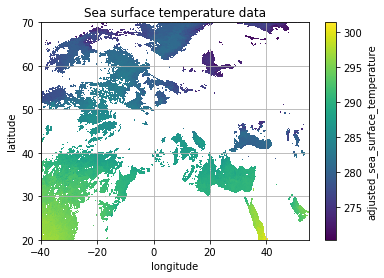

In [100]:
import matplotlib.pyplot as plt

map_data.plot()
plt.title('Sea surface temperature data')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.grid(True)
plt.show()